# Flux Balance Analysis
The purpose of the notebook is to run flux balance analysis to find the set of genome scale fluxes that maximizes biomass production.<br><br>
The flux balance analysis results are then compared to reaction rates determined by 13C-metabolic flux analysis (13C-MFA). <br><br>
The results of this notebook will be compared to transcript constained genome scale model flux results via E-Flux2. <br><br>
This notebook looks at glucose, glycerol, acetate, and oleic acid as sole carbon sources. <br><br>
In all cases, parsimonious flux balance analysis (pFBA) was used to prevent minimize degenerate solutions.


### Load imports

In [1]:
import cobra
import pandas as pd
import sys

source_dir = '../src'
sys.path.append(source_dir)
from add_column_to_13c_flux_df import add_column_to_13c_flux_df
from flux_prediction_scatterplot import flux_prediction_scatterplot

### Load the genome scale model

In [2]:
model = cobra.io.json.load_json_model("../genome_scale_models/iYLI647_corr_2.json")
model

Name,model
Memory address,139d7f580
Number of metabolites,1121
Number of reactions,1348
Number of genes,648
Number of groups,0
Objective expression,1.0*biomass_C - 1.0*biomass_C_reverse_c1d5c
Compartments,"c, e, m, n, x, r, g, v"


### Glucose GSM FBA

In [3]:
# minimal medium with glycerol as sole carbon source
model.medium = {
  'EX_glc(e)': 100.0, # 100 mmol of glucose
  'EX_h2o(e)': 10000.0,
  'EX_h(e)': 10000.0,
  'EX_nh4(e)': 10000.0,
  'EX_o2(e)': 10000.0,
  'EX_pi(e)': 10000.0,
  'EX_so4(e)': 10000.0,
}
  
with model:
  # update the model to use the specified medium
  medium = model.medium
  [print(model.medium[m], m) for m in model.medium]

  # find the optimal solution
  glucose_fba_solution = cobra.flux_analysis.pfba(model)

  # make a list of dictionaries with the reaction id, name, flux, and absolute flux
  reactions = []
  for reaction_id, flux in glucose_fba_solution.fluxes.items():
    reactions.append({
      'reaction_id': reaction_id,
      'reaction_name': model.reactions.get_by_id(reaction_id).name,
      'full_reaction': model.reactions.get_by_id(reaction_id).reaction,
      'flux': flux,
      'absolute_flux': abs(flux), # use for sorting, then drop
    })

  # make a dataframe from the list of dictionaries
  glucose_gsm_fba_df = pd.DataFrame(reactions)

  # sort the dataframe by absolute flux
  glucose_gsm_fba_df = glucose_gsm_fba_df.sort_values(by=['absolute_flux'], ascending=False)

  # drop the absolute flux column
  glucose_gsm_fba_df = glucose_gsm_fba_df.drop(columns=['absolute_flux'])

  # save the dataframe to a csv file
  glucose_gsm_fba_df.to_csv('../results/fba_gsm_fluxes/glucose_gsm_fba.csv', index=False)

  display(glucose_gsm_fba_df.head(30))


100.0 EX_glc(e)
10000.0 EX_h2o(e)
10000.0 EX_h(e)
10000.0 EX_nh4(e)
10000.0 EX_o2(e)
10000.0 EX_pi(e)
10000.0 EX_so4(e)


,reaction_id,reaction_name,full_reaction,flux
689,H2Otm,H2O transport mitochondrial,h2o[c] <=> h2o[m],-561.830307
990,ATPtm_H,ADPATP transporter mitochondrial,adp[c] + atp[m] + h[c] --> adp[m] + atp[c] + h[m],341.609652
976,PIt2m,phosphate transporter mitochondrial,h[c] + pi[c] <=> h[m] + pi[m],335.476108
607,ATPS3m,ATP synthase mitochondrial,adp[m] + 3.0 h[c] + pi[m] --> atp[m] + h2o[m] ...,326.533474
959,H2Ot,H2O transport via diffusion,h2o[e] <=> h2o[c],-325.265198
421,EX_h2o(e),H2O exchange,h2o[e] <=>,325.265198
617,CYOR_u6m,ubiquinol 6 cytochrome c reductase,2.0 ficytc[m] + 1.5 h[m] + q6h2[m] --> 2.0 foc...,286.766531
639,NADH2_u6cm,NADH dehydrogenase cytosolicmitochondrial,h[c] + nadh[c] + q6[m] --> nad[c] + q6h2[m],172.102739
957,CO2t,CO2 transporter via diffusion,co2[e] <=> co2[c],-167.905908
391,EX_co2(e),CO2 exchange,co2[e] -->,167.905908


### Glucose Central Metabolism FBA

In [4]:
# load glucose 13C MFA data
glucose_13c_mfa_df = pd.read_csv('../data/13c_mfa/glucose_13c_mfa.csv')

# only keep the reactions that are mapped to the GSM
glucose_13c_mfa_df.dropna(subset = ["reaction_ids"], inplace=True)

# add the GSM flux predictions to the 13C-MFA dataframe
glucose_central_fba_df = add_column_to_13c_flux_df(glucose_13c_mfa_df, glucose_gsm_fba_df, 'pFBA Flux')

# save the central fluxes as .csv
glucose_central_fba_df.to_csv('../results/fba_central_fluxes/glucose_central_fba.csv', index=False)

glucose_central_fba_df

,pathway,compartment,Equation,reaction_ids,13C_mfa_flux,StdErr,13C_mfa_flux_95%_lower_bound,13C_mfa_flux_95%_upper_bound,pFBA Flux
0,substrate_uptake,cytosol,Glucose + ATP -> G6P,reverse_EX_glc(e),1.000000e+02,1.000000e-01,9.980400e+01,100.1960,100.000000
1,emp,cytosol,G6P <-> F6P,PGI,2.635690e+01,1.740600e+00,2.082870e+01,29.7882,35.574485
2,emp,cytosol,F6P + ATP <-> FBP,PFK or reverse_FBP,6.530620e+01,6.654000e-01,6.344250e+01,67.9137,38.629379
3,emp,cytosol,FBP <-> DHAP + GAP,FBA,6.530620e+01,6.654000e-01,6.344250e+01,67.9137,38.629379
4,emp,cytosol,DHAP <-> GAP,TPI,6.529770e+01,6.641000e-01,6.343470e+01,67.9034,54.583426
5,emp,cytosol,GAP <-> G3P + ATP + NADH,GAPD,1.492144e+02,9.235000e-01,1.473067e+02,155.5588,125.955289
6,emp,cytosol,G3P <-> PEP,ENO,1.473693e+02,9.699000e-01,1.435083e+02,154.1212,116.254215
7,emp,cytosol,PEP <-> PYRcyt + ATP,PYK,1.401666e+02,1.107200e+00,1.362425e+02,763.1491,113.381708
8,pentose_phosphate,cytosol,G6P -> PG6 + NADPH,G6PDH2,6.654930e+01,1.722800e+00,6.027170e+01,72.0662,52.592538
9,pentose_phosphate,cytosol,PG6 -> P5P + CO2 + NADPH,GND,6.654930e+01,1.722800e+00,6.027170e+01,72.0662,53.430654


### Plot Glucose FBA Results

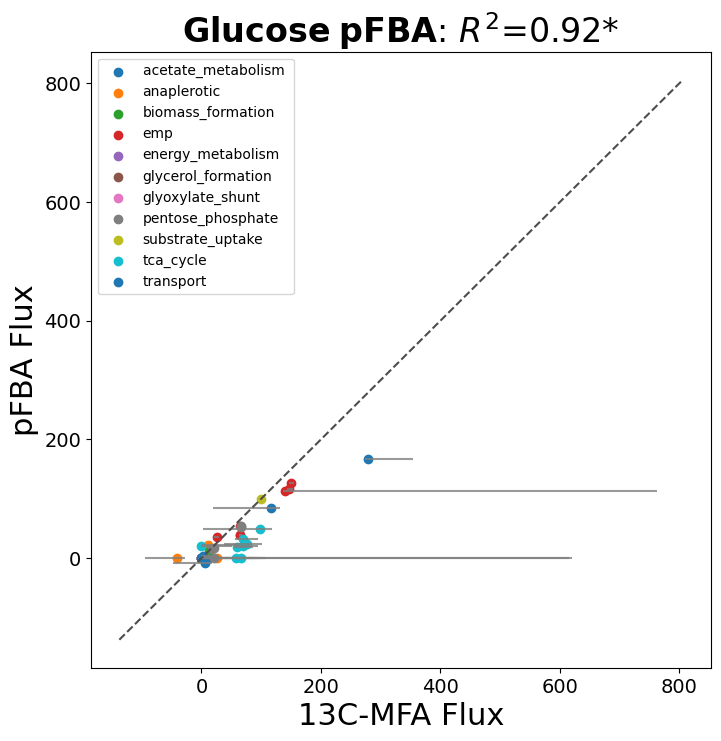

In [5]:
flux_prediction_scatterplot(
    fluxes_df=glucose_central_fba_df, 
    substrate='Glucose',
    method='pFBA',
    # range=(-100, 400)   
)

### Glycerol GSM FBA

In [6]:
# minimal medium with glycerol as sole carbon source
model.medium = {
  'EX_glyc(e)': 100.0, # 100 mmol of glycerol
  'EX_h2o(e)': 10000.0,
  'EX_h(e)': 10000.0,
  'EX_nh4(e)': 10000.0,
  'EX_o2(e)': 10000.0,
  'EX_pi(e)': 10000.0,
  'EX_so4(e)': 10000.0,
}
  
with model:
  # update the model to use the specified medium
  medium = model.medium
  [print(model.medium[m], m) for m in model.medium]

  # find the optimal solution
  glycerol_fba_solution = cobra.flux_analysis.pfba(model)

  # make a list of dictionaries with the reaction id, name, flux, and absolute flux
  reactions = []
  for reaction_id, flux in glycerol_fba_solution.fluxes.items():
    reactions.append({
      'reaction_id': reaction_id,
      'reaction_name': model.reactions.get_by_id(reaction_id).name,
      'full_reaction': model.reactions.get_by_id(reaction_id).reaction,
      'flux': flux,
      'absolute_flux': abs(flux), # use for sorting, then drop
    })

  # make a dataframe from the list of dictionaries
  glycerol_gsm_fba_df = pd.DataFrame(reactions)

  # sort the dataframe by absolute flux
  glycerol_gsm_fba_df = glycerol_gsm_fba_df.sort_values(by=['absolute_flux'], ascending=False)

  # drop the absolute flux column
  glycerol_gsm_fba_df = glycerol_gsm_fba_df.drop(columns=['absolute_flux'])

  # save the dataframe to a csv file
  glycerol_gsm_fba_df.to_csv('../results/fba_gsm_fluxes/glycerol_gsm_fba.csv', index=False)

  display(glycerol_gsm_fba_df.head(30))


100.0 EX_glyc(e)
10000.0 EX_h2o(e)
10000.0 EX_h(e)
10000.0 EX_nh4(e)
10000.0 EX_o2(e)
10000.0 EX_pi(e)
10000.0 EX_so4(e)


,reaction_id,reaction_name,full_reaction,flux
689,H2Otm,H2O transport mitochondrial,h2o[c] <=> h2o[m],-574.850423
421,EX_h2o(e),H2O exchange,h2o[e] <=>,354.104943
959,H2Ot,H2O transport via diffusion,h2o[e] <=> h2o[c],-354.104943
976,PIt2m,phosphate transporter mitochondrial,h[c] + pi[c] <=> h[m] + pi[m],315.462030
607,ATPS3m,ATP synthase mitochondrial,adp[m] + 3.0 h[c] + pi[m] --> atp[m] + h2o[m] ...,313.155793
990,ATPtm_H,ADPATP transporter mitochondrial,adp[c] + atp[m] + h[c] --> adp[m] + atp[c] + h[m],312.569434
617,CYOR_u6m,ubiquinol 6 cytochrome c reductase,2.0 ficytc[m] + 1.5 h[m] + q6h2[m] --> 2.0 foc...,258.825073
639,NADH2_u6cm,NADH dehydrogenase cytosolicmitochondrial,h[c] + nadh[c] + q6[m] --> nad[c] + q6h2[m],136.786713
964,O2t,o2 transport diffusion,o2[e] <=> o2[c],132.078744
444,EX_o2(e),O2 exchange,o2[e] <=>,-132.078744


### Glycerol Central Metabolism FBA

In [7]:
# load glycerol 13C MFA data
glycerol_13c_mfa_df = pd.read_csv('../data/13c_mfa/glycerol_13c_mfa.csv')

# only keep the reactions that are mapped to the GSM
glycerol_13c_mfa_df.dropna(subset = ["reaction_ids"], inplace=True)

# add the GSM flux predictions to the 13C-MFA dataframe
glycerol_central_fba_df = add_column_to_13c_flux_df(glycerol_13c_mfa_df, glycerol_gsm_fba_df, 'pFBA Flux')

# save the central fluxes as .csv
glycerol_central_fba_df.to_csv('../results/fba_central_fluxes/glycerol_central_fba.csv', index=False)

glycerol_central_fba_df

,pathway,compartment,Equation,reaction_ids,13C_mfa_flux,StdErr,13C_mfa_flux_95%_lower_bound,13C_mfa_flux_95%_upper_bound,pFBA Flux
0,substrate_uptake,cytosol,Glycerol -> GLYC,reverse_GLYCt,1.000000e+02,4.760000e-09,100.0000,100.0000,100.000000
3,emp,cytosol,G6P <-> F6P,PGI,-9.094400e+00,3.915980e+01,-21.4029,0.0000,-27.963948
4,emp,cytosol,F6P + ATP <-> FBP,PFK or reverse_FBP,-5.336800e+00,1.282410e+01,-9.3768,-2.2568,-18.670033
5,emp,cytosol,FBP <-> DHAP + GAP,FBA,-5.336800e+00,1.282410e+01,-9.3768,-2.2568,-18.670033
6,emp,cytosol,DHAP <-> GAP,TPI,9.466320e+01,1.282410e+01,90.5337,97.7431,80.869854
7,emp,cytosol,GAP <-> G3P + ATP + NADH,GAPD,8.980640e+01,1.234150e+01,85.8134,92.9900,69.140862
8,emp,cytosol,G3P <-> PEP,ENO,8.511740e+01,1.184310e+01,81.1338,88.5232,39.780985
9,emp,cytosol,PEP <-> PYRcyt + ATP,PYK,7.791050e+01,1.112890e+01,73.9732,606.6294,38.604114
10,pentose_phosphate,cytosol,G6P -> PG6 + NADPH,G6PDH2,9.094400e+00,3.915980e+01,0.0000,21.4029,23.115958
11,pentose_phosphate,cytosol,PG6 -> P5P + CO2 + NADPH,GND,9.094400e+00,3.915980e+01,0.0000,21.4029,23.459336


### Plot Glycerol FBA Results

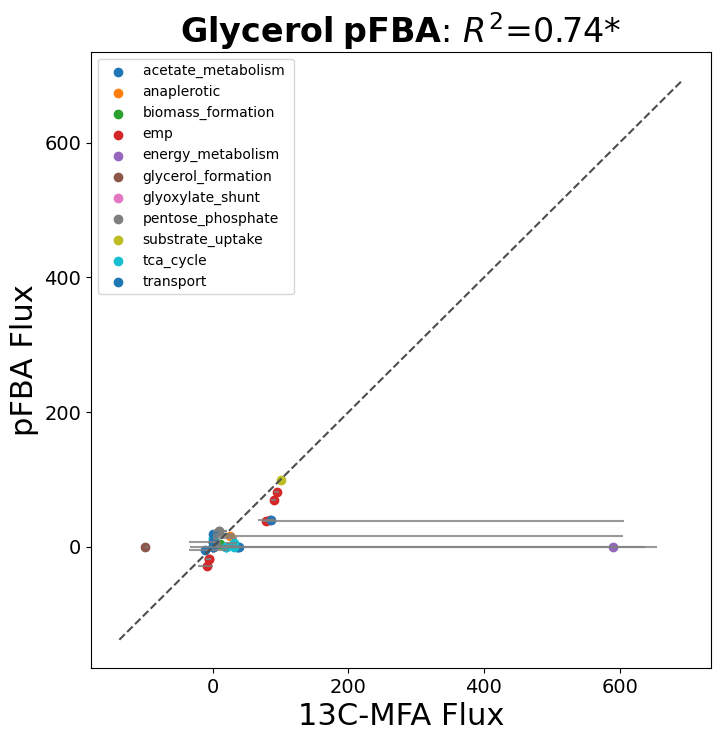

In [8]:
flux_prediction_scatterplot(
    fluxes_df=glycerol_central_fba_df, 
    substrate='Glycerol',
    method='pFBA',
    # range=(-150, 600)
)

### Oleic Acid GSM FBA

In [9]:
# minimal medium with oleic acid as sole carbon source
model.medium = {
  'EX_ocdcea(e)': 10.0, # 10 mmol of oleic acid (to prevent maxing out reactions with 1000 max flux)
  'EX_h2o(e)': 10000.0,
  'EX_h(e)': 10000.0,
  'EX_nh4(e)': 10000.0,
  'EX_o2(e)': 10000.0,
  'EX_pi(e)': 10000.0,
  'EX_so4(e)': 10000.0,
}

with model:
  # update the model to use the specified medium
  medium = model.medium
  [print(model.medium[m], m) for m in model.medium]

  # find the optimal solution
  acetate_fba_solution = cobra.flux_analysis.pfba(model)

  # make a list of dictionaries with the reaction id, name, flux, and absolute flux
  reactions = []
  for reaction_id, flux in acetate_fba_solution.fluxes.items():
    reactions.append({
      'reaction_id': reaction_id,
      'reaction_name': model.reactions.get_by_id(reaction_id).name,
      'full_reaction': model.reactions.get_by_id(reaction_id).reaction,
      'flux': flux * 10, # flux normalized to 100 mols of oleic acid
      'absolute_flux': abs(flux), # use for sorting, then drop
    })

  # make a dataframe from the list of dictionaries
  oleic_acid_gsm_fba_df = pd.DataFrame(reactions)

  # sort the dataframe by absolute flux
  oleic_acid_gsm_fba_df = oleic_acid_gsm_fba_df.sort_values(by=['absolute_flux'], ascending=False)

  # drop the absolute flux column
  oleic_acid_gsm_fba_df = oleic_acid_gsm_fba_df.drop(columns=['absolute_flux'])

  # save the dataframe to a csv file
  oleic_acid_gsm_fba_df.to_csv('../results/fba_gsm_fluxes/oleic_acid_gsm_fba.csv', index=False)

  display(oleic_acid_gsm_fba_df.head(30))


10000.0 EX_h2o(e)
10000.0 EX_h(e)
10000.0 EX_nh4(e)
10000.0 EX_o2(e)
10.0 EX_ocdcea(e)
10000.0 EX_pi(e)
10000.0 EX_so4(e)


,reaction_id,reaction_name,full_reaction,flux
689,H2Otm,H2O transport mitochondrial,h2o[c] <=> h2o[m],-3584.266821
607,ATPS3m,ATP synthase mitochondrial,adp[m] + 3.0 h[c] + pi[m] --> atp[m] + h2o[m] ...,2269.151708
990,ATPtm_H,ADPATP transporter mitochondrial,adp[c] + atp[m] + h[c] --> adp[m] + atp[c] + h[m],2265.438412
976,PIt2m,phosphate transporter mitochondrial,h[c] + pi[c] <=> h[m] + pi[m],2265.438412
617,CYOR_u6m,ubiquinol 6 cytochrome c reductase,2.0 ficytc[m] + 1.5 h[m] + q6h2[m] --> 2.0 foc...,2053.128358
798,MALOAAtp,malateoxaloacetate shuttle,mal_L[x] + oaa[c] <=> mal_L[c] + oaa[x],1383.231157
444,EX_o2(e),O2 exchange,o2[e] <=>,-1382.166538
964,O2t,o2 transport diffusion,o2[e] <=> o2[c],1382.166538
624,MDH,malate dehydrogenase,mal_L[c] + nad[c] <=> h[c] + nadh[c] + oaa[c],1289.403152
691,H2Otp,H2O transport peroxisomal,h2o[c] <=> h2o[x],1051.172760


### Oleic Acid Central Metabolism FBA

In [10]:
# load oleic acid 13C MFA data
oleic_acid_13c_mfa_df = pd.read_csv('../data/13c_mfa/oleic_acid_900_13c_mfa.csv')

# only keep the reactions that are mapped to the GSM
oleic_acid_13c_mfa_df.dropna(subset = ["reaction_ids"], inplace=True)

# add the GSM flux predictions to the 13C-MFA dataframe
oleic_acid_central_fba_df = add_column_to_13c_flux_df(oleic_acid_13c_mfa_df, oleic_acid_gsm_fba_df, 'pFBA Flux')

# save the central fluxes as .csv
oleic_acid_central_fba_df.to_csv('../results/fba_central_fluxes/oleic_acid_central_fba.csv', index=False)

oleic_acid_central_fba_df

,pathway,compartment,Equation,reaction_ids,13C_mfa_flux,StdErr,13C_mfa_flux_95%_lower_bound,13C_mfa_flux_95%_upper_bound,pFBA Flux
0,substrate_uptake,cytosol,Oleic Acid -> 9 AC,OCDCEAt,1.000000e+02,6.540000e-11,1.000000e+02,100.0000,1.000000e+02
1,emp,cytosol,G6P <-> F6P,PGI,-1.923834e+02,1.445210e+01,-2.594513e+02,0.0000,-3.070131e+01
2,emp,cytosol,F6P + ATP <-> FBP,PFK or reverse_FBP,-7.590870e+01,5.702400e+00,-9.804160e+01,-6.9760,-6.943726e+01
3,emp,cytosol,FBP <-> DHAP + GAP,FBA,-7.590870e+01,5.702400e+00,-9.804160e+01,-6.9760,-6.943726e+01
4,emp,cytosol,DHAP <-> GAP,TPI,-7.590870e+01,5.702400e+00,-3.377775e+02,-13.5021,-7.235106e+01
5,emp,cytosol,GAP <-> G3P + ATP + NADH,GAPD,-1.007287e+02,7.566900e+00,-2.443168e+02,-41.9351,-1.466283e+02
6,emp,cytosol,G3P <-> PEP,ENO,-1.289800e+02,9.689200e+00,-3.426249e+02,-42.6334,-1.466283e+02
7,emp,cytosol,PEP <-> PYRcyt + ATP,PYK,3.372210e+01,2.525395e+02,NaN,1580.0000,0.000000e+00
8,pentose_phosphate,cytosol,G6P -> PG6 + NADPH,G6PDH2,1.923834e+02,1.445210e+01,0.000000e+00,259.4513,0.000000e+00
9,pentose_phosphate,cytosol,PG6 -> P5P + CO2 + NADPH,GND,1.923834e+02,1.445210e+01,0.000000e+00,259.4513,2.174537e+00


### Plot Oleic Acid FBA Results

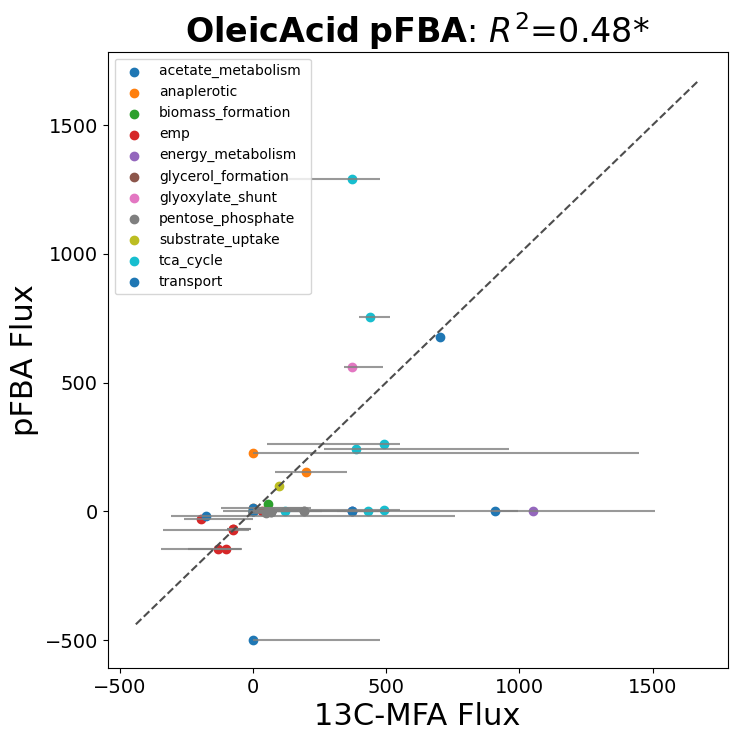

In [11]:
flux_prediction_scatterplot(
    fluxes_df=oleic_acid_central_fba_df, 
    substrate='Oleic Acid',
    method='pFBA',
    # range=(-100, 400)   
)

### Acetate GSM FBA

In [12]:
# minimal medium with acetate as sole carbon source
model.medium = {
  'EX_ac(e)': 100.0, # 100 mmol of acetate
  'EX_h2o(e)': 10000.0,
  'EX_h(e)': 10000.0,
  'EX_nh4(e)': 10000.0,
  'EX_o2(e)': 10000.0,
  'EX_pi(e)': 10000.0,
  'EX_so4(e)': 10000.0,
}

with model:
  # update the model to use the specified medium
  medium = model.medium
  [print(model.medium[m], m) for m in model.medium]

  # find the optimal solution
  acetate_fba_solution = cobra.flux_analysis.pfba(model)

  # make a list of dictionaries with the reaction id, name, flux, and absolute flux
  reactions = []
  for reaction_id, flux in acetate_fba_solution.fluxes.items():
    reactions.append({
      'reaction_id': reaction_id,
      'reaction_name': model.reactions.get_by_id(reaction_id).name,
      'full_reaction': model.reactions.get_by_id(reaction_id).reaction,
      'flux': flux,
      'absolute_flux': abs(flux), # use for sorting, then drop
    })

  # make a dataframe from the list of dictionaries
  acetate_gsm_fba_df = pd.DataFrame(reactions)

  # sort the dataframe by absolute flux
  acetate_gsm_fba_df = acetate_gsm_fba_df.sort_values(by=['absolute_flux'], ascending=False)

  # drop the absolute flux column
  acetate_gsm_fba_df = acetate_gsm_fba_df.drop(columns=['absolute_flux'])

  # save the dataframe to a csv file
  acetate_gsm_fba_df.to_csv('../results/fba_gsm_fluxes/acetate_gsm_fba.csv', index=False)

  display(acetate_gsm_fba_df.head(30))


100.0 EX_ac(e)
10000.0 EX_h2o(e)
10000.0 EX_h(e)
10000.0 EX_nh4(e)
10000.0 EX_o2(e)
10000.0 EX_pi(e)
10000.0 EX_so4(e)


,reaction_id,reaction_name,full_reaction,flux
607,ATPS3m,ATP synthase mitochondrial,adp[m] + 3.0 h[c] + pi[m] --> atp[m] + h2o[m] ...,288.370347
689,H2Otm,H2O transport mitochondrial,h2o[c] <=> h2o[m],-254.968998
617,CYOR_u6m,ubiquinol 6 cytochrome c reductase,2.0 ficytc[m] + 1.5 h[m] + q6h2[m] --> 2.0 foc...,218.157527
959,H2Ot,H2O transport via diffusion,h2o[e] <=> h2o[c],-145.294979
421,EX_h2o(e),H2O exchange,h2o[e] <=>,145.294979
990,ATPtm_H,ADPATP transporter mitochondrial,adp[c] + atp[m] + h[c] --> adp[m] + atp[c] + h[m],132.557867
846,NADH2_u6m,NADH dehydrogenase mitochondrial,h[m] + nadh[m] + q6[m] --> nad[m] + q6h2[m],129.024067
391,EX_co2(e),CO2 exchange,co2[e] -->,113.961697
957,CO2t,CO2 transporter via diffusion,co2[e] <=> co2[c],-113.961697
444,EX_o2(e),O2 exchange,o2[e] <=>,-110.374569


### Acetate Central Metabolism FBA

In [13]:
# # load acetate 13C MFA data
# acetate_13c_mfa_df = pd.read_csv('../data/13c_mfa/acetate_13c_mfa.csv')

# # only keep the reactions that are mapped to the GSM
# acetate_13c_mfa_df.dropna(subset = ["reaction_ids"], inplace=True)

# # add the GSM flux predictions to the 13C-MFA dataframe
# acetate_central_fba_df = add_column_to_13c_flux_df(acetate_13c_mfa_df, acetate_gsm_fba_df, 'pFBA Flux')

# # save the central fluxes as .csv
# acetate_central_fba_df.to_csv('../results/fba_central_fluxes/acetate_central_fba.csv', index=False)

# acetate_central_fba_df